# 라이브러리 로드

In [1]:
!pip install lda

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 351 kB 4.5 MB/s 
     |████████████████████████████████| 99 kB 5.2 MB/s 


In [2]:
import nltk
import re
import collections
import itertools
import lda
import requests
import csv
import time
import math
import operator
import numpy as np
import pandas as pd
from collections import defaultdict
from pandas import read_table
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB # 다항분포 나이브 베이즈 모델
from sklearn.metrics import accuracy_score    # 정확도 계산

In [4]:
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

Hit:1 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Get:8 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease [15.9 kB]
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:13 http

In [5]:
%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

env: JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"


In [6]:
from konlpy.tag import Okt
import nltk

In [7]:
from IPython.core.display import DisplayObject
DisplayObject

IPython.core.display.DisplayObject

In [8]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [9]:
okt=Okt()

# 불용어 불러오기

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
# 불용어 리스트 불러오기
stopword = pd.read_csv('/content/drive/MyDrive/stop_words_fin.csv', encoding='utf-8',header=None)

# 불용어 리스트화
stopword = stopword[0].to_list()

stopword[:10]

['0', '않다', '되어다', '되다', '하다', '어떻다', '이렇다', '이다', '어제', '매일']

# 분류목록 생성

In [12]:
ps_app = ['좋아요','없어요','좋은데','앱','굿','시청','좋겠어요','있는','좋네요','최고','보기',
'좋은','좋겠습니다','문제','있습니다','좋습니다','없네요','추천','있으면','많고','있어요',
'없음','있었으면','좋음','있게','불편해요','만족','없는','많은','좋다','재밌어요','짱',
'다양한','있음','없고','리뷰','빠른','재밌게','좋겠네요','아쉽네요','좋을','별로','좋을거',
'재미있어요','많아요','매우','좋아해서','좋을것','없다','대박','많에요','불편합니다',
'불편하네요','불편하네요','아쉬운','괜찮은데','단점','좋지만','불편','있지만','불편한',
'불편함','많음','좋겠음','다양하고','꿀잼','필요합니다','없나요','없어','잘못','잼','재미있네요',
'괜찮아요','재밌음','굿굿','안되네요','감동','아쉽습니다','가능했으면','평점','잼나요',
'좋겟고','장점','재밌는게','만족합니다','좋아용','만족하고','아쉬운게','즐길','불만',
'이상해요','해줬으면','피드백','필요함','재밌고','만족하지만','다양하게','필요할',
'만족스럽습니다','좋겠다','필요해','안되는','보람','퀄리티','최고다','재밌다','모욕',
'아쉽다','악플','재미있고','좋아하시는','짱짱','나쁜','재밌습니다','알럽','불편함이','후기',
'안되니깐','저작권','짜증남','좋고요','많지만','편인데요','만족해요','불편한건','최상',
'만족합니다만','부족해요','개판','재미있습니다','많다는','만족스러워요','좋겠다는',
'최상급','빠르고','재미있다','재미있었어요','강추','힐링','재밌네요','부족하다','좋았습니다',
'부족함','감성','심하네요','만족하며']

In [13]:
ps_function = ['자막','기능','버그','배속','설정','화면','크기','영상','재생','조절','개선','더빙',
'사용','밝기','한국어','어플','업데이트','화질','영어','버튼','한글','속도','서비스','모바일',
'오류','검색','아이패드','언어','버전','프로필','오디오','스트리밍','배경','그래픽','연결',
'모드','소리','자동','조정','글씨','폰트','싱크','핸드폰','접속','편의','프로그램','휴대폰','다운로드',
'음량','표시','볼륨','디플','인터페이스','안드로이드','창','비율','컴퓨터','태블릿','로딩',
'문의','음성','버퍼링','웹','인터넷','중국어','설치','옵션','갤럭시탭','스마트','사이즈',
'사진','동영상','렉','음악','다운','한국말','사항','데이터','랙','음질','보완',
'현상','조작','디자인','댓글','패드','발열','일본어','카테고리','로컬라이징','스킵',
'채팅','갤럭시','업그레이드','고화질','터치','넘기기','클릭','와이파이','반복','방향키',
'업뎃','톤','편이','궁서체','정지','하단','컨트롤','동기화','탐색','알림','탭','접근성'
'화면비율','링크','활성화','글꼴','배터리','스크린','넘버','자판','호환','사이트',
'알람','줄이면','컬렉션','콩고어','스테레오','표기','오역','어둡네요','직역','끊기는','끊겼다가','번역가','어두워요']

In [14]:
ps_contents = ['디즈니',
'마블',
'영화',
'컨텐츠',
'드라마',
'시리즈',
'한국',
'콘텐츠',
'시즌',
'넷플릭스',
'넷플',
'작품',
'스타워즈',
'스파이더맨',
'사랑',
'애니메이션',
'폰',
'티비',
'아이폰',
'픽사',
'애니',
'로키'
'심슨',
'가요',
'왓챠',
'덕후',
'설강화',
'구글',
'내셔널',
'볼거리',
'만화',
'출시',
'소피아',
'플랫폼',
'다비',
'다니엘',
'팔콘',
'만달',
'상륙',
'워치',
'다큐',
'유튜브',
'장르',
'윈터',
'헐크',
'왓이프',
'예고편',
'호크아이',
'가족',
'완다',
'스타',
'에피소드',
'캐스트',
'한국인',
'외국',
'개봉',
'칸토',
'내용물',
'디즈니채널',
'인생',
'간첩',
'해외',
'구성',
'단편',
'아이맥스',
'고전',
'위대',
'한쇼',
'맨',
'하우스',
'애니매이션',
'겨울왕국',
'미드',
'감기',
'게임',
'친구',
'추억',
'웨이',
'어벤져스',
'좀비',
'예능',
'릭스',
'경찰',
'메이',
'커밍',
'디지니',
'알라딘',
'소니',
'샹치',
'네셔널',
'주니어',
'난쟁이',
'역사',
'안기부',
'학살',
'솔져',
'멀티버스',
'히어로',
'나이트',
'미국',
'집',
'애플',
'크레딧',
'키즈',
'폭스',
'널지오',
'고려',
'멀티',
'그래비티',
'검수',
'쿠팡',
'캐슬',
'국내',
'펫',
'레이',
'극장',
'국가',
'광고',
'배우',
'머리',
'뉴스',
'티빙',
'에어플레이',
'엔드게임'
'쇼',
'닥스',
'솔저',
'신작',
'비밀',
'함정',
'층',
'해방',
'괴짜가족',
'괴담',
'일기',
'수업',
'디지니가',
'엄마',
'나이',
'유투브',
'베놈',
'행복',
'터널',
'무크',
'뮤지컬',
'신분',
'미키',
'주심',
'장기',
'한국영',
'리즈',
'권력',
'상속',
'제작자',
'북한',
'제작',
'시민',
'유태인',
'반성',
'군사정권',
'상영',
'백설공주',
'갓즈니',
'동네',
'만해',
'비비',
'우리나라',
'공주',
'폴드',
'캡틴아메리카',
'앤트맨',
'닥터',
'그레이아나토미',
'뱀파이어',
'리나',
'알고리즘',
'초대장',
'강아지',
'꿈',
'청춘',
'스티치',
'너와나',
'킹',
'나이트로',
'아이맥',
'프레',
'벨',
'에어',
'비전',
'코리아',
'브랜드',
'단독',
'철수',
'명작',
'개임',
'파파',
'제로',
'문도',
'유사컨첸츠',
'사파리',
'비애',
'모스',
'폴즈'
]

In [15]:
ps_payment = ['플러스','결제','구독','가입','돈','환불','이용','무료','계정','인증','가격','성인',
'로그인','사용자','플레이','구매','기간','연간','결재','정액','페이','요금','오프라인','만원',
'구독료','아이디','정독','이메일','공짜','신규','프로모션','쿠폰','값','청구','챗봇''저렴한','비싸고','저렴하다고']

In [16]:
ng_app = ['앱', '어플', '없음', '문제', '없고', '시청', '안됨', '서비스', '성인', '안되고', '최악', '정도', '별로', '지원', '없는', '있는', '없네요', 
          '안되네요', '무한', '없어요', '안됩니다', '처음', '해결', '쓰레기', '불편해요', '안되는', '실망', '불편함', '먹통', '출시', '있음', '개판', 
          '좋은데', '없어', '오역', '엉망', '있게', '불편합니다', '없다', '안되요', '좋겠어요', '불편', '구림', '좋겠습니다', '버퍼링', '공개', '매우', 
          '준비', '늦게', '있습니다', '빠른', '없나요', '있어서', '불편하네요', '전혀', '추천', '많아요', '했더니', '버그', '오타', '관리', '없는데', 
          '진행', '구려', '부족', '도대체', '불편한', '않아요', '좋은', '볼수가', '연간', '있으면', '불편하고', '있었으면', '아쉽네요', '있어요', 
          '태블릿', '퀄리티', '안되서', '발생', '뜨네요', '많네요', '안되는데', '좋겠네요', '오프라인', '안되는게', '부족한', '솔직히', '느리고', 
          '번역가', '지웠다', '안함', '당연히', '좋아요', '작아서', '없는거', '스마트', '있다고', '장점', '구리', '작아요', '불만', '필요합니다', 
          '나오네요', '불편하게', '해야지', '보네요', '빼고', '불가능', '스트레스', '없다고', '멈추고', '지우고', '느림', '맞는', '않나요', '되어야', 
          '안되어', '있어야', '않아', '필요해', '안된', '안되는건', '있지만', '큽니다', '커요', '많아', '힘들어요', '많지만', '괜찮은데', '있었는데', 
          '아깝네요', '사용성', '맞아요', '이상함', '최소한', '제외', '마음', '드럽게', '아닌가', '틀렸다고', '몰라도', '아쉬움', '아쉽습니다', '단점', 
          '좋을', '이상한', '관심', '좋겠음', '이상해요', '끝나면', '맞게', '짜증', '좋지만', '힘듬', '개발자', '체험', '독점', '지웠다가', '느려요', 
          '걸림', '호구', '없으니', '좋긴', '경쟁', '좋을듯', '답답해요', '어렵고', '들어가서', '안될까', '짜증나네요', '답답하네요', '되면서', '걸려요', 
          '않으면', '비추', '불편해서', '안정', '안좋음', '안되죠', '불편함이', '후기', '하자', '현저', '노잼', '좋음', '좋아해서', '고려', '필요함', 
          '있던데', '되지도', '이상하고', '평가', '기대했는데', '심하고', '생겼으면', '불편해', '안되면', '아닙니다', '않아서', '최소', '안나옵니다', 
          '제멋대로', '어렵게', '느려', '아닙니까', '잘못', '느린', '시급함', '적음', '구린', '고칠', '기분', '부족함', '없는것도', '힘드네요', 
          '보는거', '떨어지네요', '켜짐', '불편하네', '했네', '후회', '해주는', '막상', '결과', '필요해요', '작아졌어요', '짜증남', '좋아하는데', 
          '이상하게', '발전', '급하게', '기대하고', '였는데', '있지', '충분히', '부족하고', '껐다', '필요한', '짜증나서', '겁니다', '정식', '만드세요', 
          '빡침', '부족한건', '은근', '있나', '바꿔주세요', '부족합니다', '의문', '기다려야', '짜증납니다', '항의', '볼꺼', '졸라', '무시', '똥', '줍니다', 
          '안되네', '기존', '짜증나', '투성이', '논란', '많지', '없죠', '없어도', '시급해', '들어왔으면', '보완', '않은', '들어가도', '피드백', '좋습니다', 
          '거슬려요', '답답', '사소한', '보이는데', '없었는데', '할수도', '뜨는것도', '해석', '되더니', '치더라도', '어려움', '잇는지', '작습니다', 
          '더럽게', '다신', '있으면서', '아닌거', '아닌듯', '멈춰', '안되어서', '해주시기', '해주길', '답답해서', '이상해서', '깔았다가', '봤다', 
          '심각하게', '로고', '후짐', '답답해', '싫어요', '없을듯', '고쳐주셨으면', '넘어왔는데', '없다면', '노답', '구린데', '버벅거림', '적은', 
          '나은듯', '안되지', '안되냐', '크다', '힘들', '해줬으면', '최상', '아쉬운', '심플', '다양하고', '불편하고요', '기대했던', '부정', '기다렸는데', 
          '좋네요', '너무하네요', '불편한건', '하기도', '알아야', '된다는', '받았는데', '하는거랑', '올려야', '보일', '바뀌는', '안되잖아요', '가능한데', 
          '답답합니다', '있으나', '대박', '할것', '지적', '정작', '거슬립니다']

In [17]:
ng_function = ['자막',
'재생',
'화면',
'기능',
'영상',
'설정',
'개선',
'배속',
'오류',
'조절',
'로딩',
'사용',
'밝기',
'크기',
'삭제',
'실행',
'더빙',
'보기',
'접속',
'한국어',
'티비',
'업데이트',
'설치',
'기본',
'속도',
'버튼',
'다운',
'다운로드',
'연결',
'화질',
'한글',
'검색',
'자동',
'구글',
'모바일',
'싱크',
'소리',
'모드',
'영어',
'편의',
'아이패드',
'프로필',
'배경',
'스트리밍',
'창',
'나오는',
'인터페이스',
'존댓말',
'조정',
'와이파이',
'글씨',
'볼륨',
'디플',
'글자',
'사항',
'번역기',
'탭',
'음량',
'표시',
'반복',
'데이터',
'스킵',
'폰트',
'터치',
'작게',
'사운드',
'음성',
'사이즈',
'넘기기',
'중국어',
'언어',
'오디오',
'클릭',
'노트북',
'넘어가는',
'넘어가기',
'컴퓨터',
'빠르게',
'감기',
'환경',
'팝업창',
'알림',
'갤럭시탭',
'메모리',
'호환',
'바탕',
'옵션',
'최적화',
'네트워크',
'넘김',
'웹',
'그래픽',
'작음',
'정지',
'전화',
'버벅',
'문제점',
'멈춤',
'적용',
'현상',
'조작',
'검수',
'가독성',
'어두워서',
'맞춤법',
'테두리',
'쓰기',
'제한',
'크레딧',
'연결하면',
'체크',
'호환성',
'콘솔',
'용량',
'링크',
'자판',
'검정색',
'프로그램',
'튕김',
'댓글',
'패드',
'눌러',
'구동',
'파일',
'외국어',
'크롬',
'채팅',
'재부팅',
'열림',
'끊기고',
'기술',
'투명',
'접근성',
'전송',
'동작',
'음질',
'구간',
'알람',
'이중',
'디자인',
'제품',
'인치',
'슬라이드',
'탐색',
'지역',
'구분',
'부가',
'중단',
'편집',
'업그레이드',
'편리',
'공지',
'중복',
'접근',
'항목',
'갤폴드',
'잠금도',
'레노버',
'비율',
'튕겨',
'멀티',
'구글번역기',
'방향키',
'윈도우',
'첨부',
'편이',
'하단',
'컨트롤',
'서라운드',
'패치',
'렉'
]

In [18]:
ng_contents = ['디즈니',
'컨텐츠',
'넷플릭스',
'영화',
'마블',
'콘텐츠',
'넷플',
'드라마',
'작품',
'폰',
'크롬캐스트',
'시즌',
'리뷰',
'핀',
'시리즈',
'가요',
'역사왜곡',
'많고',
'많음',
'왓챠',
'많은',
'심슨',
'국내',
'역사',
'스타워즈',
'내용',
'애니메이션',
'쿠팡',
'유튜브',
'광고',
'애니',
'상황',
'미드',
'왜곡',
'야함',
'미국',
'동영상',
'해외',
'웨이브',
'중국',
'스파이더맨',
'다큐',
'티빙',
'카테고리',
'집',
'나올',
'에피소드',
'데드풀',
'워킹데드',
'친구',
'없다는',
'외국',
'관계',
'예정',
'업뎃',
'투자',
'세상',
'시장',
'팬',
'보바',
'펫',
'한국인',
'국가',
'일본어',
'홍보',
'킹스',
'몰입도',
'코리아',
'키즈',
'지오',
'맨',
'로키',
'한편',
'장르',
'이야기',
'디지니',
'젠',
'세계',
'실화',
'스마트폰',
'평점',
'팀',
'다양한',
'픽사',
'개봉',
'플스',
'신작',
'갤',
'기억',
'중인',
'직원',
'호크아이',
'민주화',
'운동',
'만해',
'네이버',
'애플',
'내셔널',
'캐스트',
'독자',
'빔',
'법',
'인크레더블',
'시대',
'엔딩',
'글로벌',
'미화',
'동북공정',
'캐릭터',
'만화',
'나이트',
'파파',
'전세계',
'초반',
'프로젝트',
'맛',
'쇼',
'팔콘',
'윈터',
'통일',
'리안',
'샹치',
'베놈',
'정이',
'넥플릭스',
'고문',
'어른',
'개미',
'우리나라',
'엔딩크레딧',
'솔져',
'심슨가족',
'지도',
'가족',
'철수',
'그룹',
'성격',
'게임',
'극장',
'직역',
'일본',
'그레이',
'토미',
'어벤져스',
'극장판',
'야하는',
'헐크',
'왓차',
'유플러스',
'야할',
'컨탠츠',
'만달',
'히틀러',
'전쟁',
'쿠키',
'외국인',
'아이언맨',
'신분',
'주니어',
'방송',
'남색',
'한국영',
'안기부',
'민주주의',
'제작',
'나치',
'갤탭',
'미디어',
'이프',
'시청자',
'심의',
'진출',
'사랑',
'취향',
'구성',
'스타',
'명작',
'저작권',
'모스',
'벤치마킹',
'고해',
'크롤',
'배우',
'미니',
'얼굴',
'비행기',
'한국말',
'테츠',
'경찰',
'설강화'
]

In [19]:
ng_payment = ['결제',
'돈',
'구독',
'인증',
'플러스',
'가입',
'환불',
'로그인',
'해지',
'이용',
'계정',
'안드로이드',
'플레이',
'내고',
'무료',
'갤럭시',
'비번',
'고객',
'결재',
'확인',
'사용자',
'핸드폰',
'아이폰',
'플랫폼',
'휴대폰',
'카드',
'센터',
'구매',
'문의',
'탈퇴',
'아이디',
'기간',
'유료',
'회원',
'가격',
'이메일',
'불법',
'등급',
'단계',
'통신사',
'멤버십',
'나이',
'로그아웃',
'불매',
'거부',
'통화',
'발주',
'이용권',
'앱스토어',
'월간',
'숫자',
'금액',
'만원',
'요금',
'어플리케이션',
'이용자',
'주소',
'이벤트',
'승인',
'대가',
'구글플레이',
'값',
'정액',
'구입',
'사기',
'아웃',
'시급',
'신규',
'지불',
'응답',
'양도',
'베타테스터',
'앱위',
'엘지',
'보상',
'구독료',
'공짜',
'연간'
]

# 데이터 로드

In [20]:
df = pd.read_csv('/content/drive/MyDrive/dis_2022_2q.csv')
df

,Unnamed: 0,rating,review,date,userName,title,quarter,year
0,30,2,마블 픽사 넷지오 보려고 구독한거긴 한데 그렇다고 해도 콘텐츠가 너무 빈약하네요;;...,2022-04-01 01:57:33,kim자몽,NaN,2022/2Q,2022
1,260,5,아직 아무것도 안봤구해서요 ㅜ 환불부탁드려요ㅠㅠ,2022-04-01 03:10:29,천서진와이프,이번달 결제됐는데 환불 가능한가요,2022/2Q,2022
2,399,1,"정말아쉽습니다 특히 키즈 부분 자동종료없음이나 스킵, 이어재생 등이 왜없는지요 ㅠ",2022-04-01 07:48:58,Troo Torm,NaN,2022/2Q,2022
3,3446,5,ㆍㆍㆍ?,2022-04-01 11:41:57,송승환,NaN,2022/2Q,2022
4,150,1,방에 있는 티비로 주로 보는데요. 다른 OTT 앱 보다 늦게 출시해놓고 이렇게 앱기...,2022-04-01 12:28:51,tienskyh,늦게 출시했으면서 앱이 엉망 징창,2022/2Q,2022
...,...,...,...,...,...,...,...,...
724,1143,3,자막이 엉망이네요 신경좀 쓰셔야 할듯요,2022-06-30 18:30:01,이혜경,NaN,2022/2Q,2022
725,272,3,화면이 너무 어두워요 밝기 조절 안될까요,2022-06-30 19:00:50,황욱,NaN,2022/2Q,2022
726,2185,1,돈벌어서 피규어 만들지말고 앱개발자 부터 찾길,2022-06-30 19:18:05,박준형,NaN,2022/2Q,2022
727,1252,5,느낌이 어떤지 몰라요,2022-06-30 22:00:54,도원7살,NaN,2022/2Q,2022


In [21]:
df = df.dropna()

# 리뷰 전체를 한 문자열로 통합

In [22]:
# 리뷰들을 모두 한 문자열로 통합
reviews = ''
   
for i in df['review'] : 
  reviews = reviews + i + '\n'

In [23]:
from collections import defaultdict
from pandas import read_table
import numpy as np
import math

class NaiveBayesClassifier:

    def __init__(self, k=0.5):
        self.k = k
        self.word_probs = []

    def load_corpus(self, path):
        corpus = read_table(path, sep=',', encoding='utf-8')
        corpus = np.array(corpus)
        return corpus

    def count_words(self, training_set):
        # 학습데이터는 영화리뷰 본문(doc), 평점(point)으로 구성

        counts = defaultdict(lambda : [0, 0])
        for doc, point in training_set:
            # 영화리뷰가 text일 때만 카운트
            if self.isNumber(doc) is False:
                  
                  words = okt.pos(doc)

                  ls = []
                  for i,j in words : 
                    if j == 'Noun' or j == 'Adjective' or j == 'Verb' :
                        ls.append(i)

                  ls2 = []
                  for i in ls :
                    if i not in stopword :
                      ls2.append(i)

                  for word in ls2:
                    counts[word][0 if point > 3.5 else 1] += 1
        
        return counts

    def isNumber(self, s):
        try:
            float(s)
            return True
        except ValueError:
            return False

    def word_probabilities(self, counts, total_class0, total_class1, k):
        # 단어의 빈도수를 [단어, p(w|긍정), p(w|부정)] 형태로 반환
        return [(w,
                 (class0 + k) / (total_class0 + 2*k),
                 (class1 + k) / (total_class1 + 2*k))
                for w, (class0, class1) in counts.items()]

    def class0_probability(self, word_probs, doc):
        # 별도 토크나이즈 안하고 띄어쓰기로만
        docwords = okt.pos(doc)

        ls = []
        for i,j in docwords : 
          if j == 'Noun' or j == 'Adjective' or j == 'Verb' :
              ls.append(i)

        ls2 = []
        for i in ls :
          if i not in stopword :
            ls2.append(i)

        docwords = ls2

        # 초기값은 모두 0으로 처리
        log_prob_if_class0 = log_prob_if_class1 = 0.0

        # 모든 단어에 대해 반복
        for word, prob_if_class0, prob_if_class1 in word_probs:
            # 만약 리뷰에 word가 나타나면
            # 해당 단어가 나올 log 확률을 더해 줌
            if word in docwords:
                log_prob_if_class0 += math.log(prob_if_class0)
                log_prob_if_class1 += math.log(prob_if_class1)

            # 만약 리뷰에 word가 나타나지 않는다면
            # 해당 단어가 나오지 않을 log 확률을 더해 줌
            # 나오지 않을 확률은 log(1-나올 확률)로 계산
            else:
                log_prob_if_class0 += math.log(1.0 - prob_if_class0)
                log_prob_if_class1 += math.log(1.0 - prob_if_class1)

        prob_if_class0 = math.exp(log_prob_if_class0)
        prob_if_class1 = math.exp(log_prob_if_class1)
        return prob_if_class0 / (prob_if_class0 + prob_if_class1)

    def train(self, trainfile_path):
        training_set = self.load_corpus(trainfile_path)

        # 범주0(긍정)과 범주1(부정) 문서 수를 세어 줌
        num_class0 = len([1 for _, point in training_set if point > 3.5])
        num_class1 = len(training_set) - num_class0

        # train
        word_counts = self.count_words(training_set)
        self.word_probs = self.word_probabilities(word_counts,
                                                  num_class0,
                                                  num_class1,
                                                  self.k)

    def classify(self, doc):
        return self.class0_probability(self.word_probs, doc)

In [24]:
df = df[['review', 'rating']]

In [25]:
df.to_csv('filtered.csv',index=None,header=None)

In [26]:
model = NaiveBayesClassifier()
model.train(trainfile_path = 'filtered.csv')

In [27]:
# 긍정 단어 가중치로 딕셔너리 만들기
dict_p = {}
for i in model.word_probs:
    dict_p[i[0]] = i[1]
# 부정 단어 가중치로 딕셔너리 만들기    
dict_n = {}
for i in model.word_probs:
    dict_n[i[0]] = i[2]
# 각 딕셔너리 값을 내림차순 정렬
sort_dict_p = sorted(dict_p.items(), key=operator.itemgetter(1), reverse=True)
sort_dict_n = sorted(dict_n.items(), key=operator.itemgetter(1), reverse=True)

In [28]:
ps_app_dic = {}
for topic in ps_app:
    for word,value in dict_p.items():
        if(topic == word):
            ps_app_dic[word] = value
print(ps_app_dic)

{'좋아요': 0.05172413793103448, '없어요': 0.017241379310344827, '좋은데': 0.1206896551724138, '앱': 0.017241379310344827, '시청': 0.017241379310344827, '좋겠어요': 0.017241379310344827, '있는': 0.017241379310344827, '좋네요': 0.08620689655172414, '보기': 0.05172413793103448, '좋은': 0.017241379310344827, '좋겠습니다': 0.05172413793103448, '문제': 0.017241379310344827, '있습니다': 0.05172413793103448, '좋습니다': 0.08620689655172414, '없네요': 0.017241379310344827, '많고': 0.05172413793103448, '있어요': 0.017241379310344827, '없음': 0.05172413793103448, '있었으면': 0.05172413793103448, '있게': 0.05172413793103448, '불편해요': 0.017241379310344827, '만족': 0.05172413793103448, '없는': 0.05172413793103448, '많은': 0.017241379310344827, '있음': 0.05172413793103448, '없고': 0.05172413793103448, '리뷰': 0.017241379310344827, '빠른': 0.017241379310344827, '좋을': 0.05172413793103448, '별로': 0.017241379310344827, '매우': 0.017241379310344827, '없다': 0.08620689655172414, '불편합니다': 0.017241379310344827, '괜찮은데': 0.05172413793103448, '단점': 0.017241379310344827, '불편': 0.0172413

In [29]:
ps_function_dic = {}
for topic in ps_function:
    for word,value in dict_p.items():
        if(topic == word):
            ps_function_dic[word] = value
print(ps_function_dic)

{'자막': 0.1206896551724138, '기능': 0.25862068965517243, '버그': 0.05172413793103448, '배속': 0.3620689655172414, '설정': 0.017241379310344827, '화면': 0.05172413793103448, '크기': 0.017241379310344827, '영상': 0.08620689655172414, '재생': 0.017241379310344827, '조절': 0.017241379310344827, '개선': 0.017241379310344827, '더빙': 0.05172413793103448, '사용': 0.017241379310344827, '밝기': 0.017241379310344827, '한국어': 0.05172413793103448, '어플': 0.017241379310344827, '업데이트': 0.017241379310344827, '화질': 0.05172413793103448, '영어': 0.08620689655172414, '버튼': 0.017241379310344827, '한글': 0.017241379310344827, '속도': 0.05172413793103448, '서비스': 0.017241379310344827, '모바일': 0.017241379310344827, '오류': 0.017241379310344827, '검색': 0.017241379310344827, '아이패드': 0.08620689655172414, '버전': 0.05172413793103448, '프로필': 0.017241379310344827, '연결': 0.017241379310344827, '자동': 0.017241379310344827, '글씨': 0.017241379310344827, '폰트': 0.05172413793103448, '핸드폰': 0.017241379310344827, '접속': 0.017241379310344827, '편의': 0.017241379310344827

In [30]:
ps_contents_dic = {}
for topic in ps_contents:
    for word,value in dict_p.items():
        if(topic == word):
            ps_contents_dic[word] = value
print(ps_contents_dic)

{'디즈니': 0.08620689655172414, '마블': 0.017241379310344827, '영화': 0.017241379310344827, '컨텐츠': 0.05172413793103448, '드라마': 0.017241379310344827, '시리즈': 0.017241379310344827, '한국': 0.08620689655172414, '콘텐츠': 0.05172413793103448, '시즌': 0.08620689655172414, '넷플릭스': 0.017241379310344827, '넷플': 0.05172413793103448, '작품': 0.05172413793103448, '스타워즈': 0.017241379310344827, '애니메이션': 0.05172413793103448, '폰': 0.017241379310344827, '티비': 0.017241379310344827, '아이폰': 0.017241379310344827, '애니': 0.017241379310344827, '가요': 0.017241379310344827, '왓챠': 0.017241379310344827, '출시': 0.017241379310344827, '플랫폼': 0.017241379310344827, '팔콘': 0.017241379310344827, '유튜브': 0.017241379310344827, '장르': 0.017241379310344827, '한국인': 0.05172413793103448, '외국': 0.017241379310344827, '개봉': 0.017241379310344827, '애니매이션': 0.05172413793103448, '미드': 0.05172413793103448, '좀비': 0.017241379310344827, '예능': 0.05172413793103448, '주니어': 0.017241379310344827, '나이트': 0.05172413793103448, '미국': 0.05172413793103448, '크레딧': 0.0172

In [31]:
ps_payment_dic = {}
for topic in ps_payment:
    for word,value in dict_p.items():
        if(topic == word):
            ps_payment_dic[word] = value
print(ps_payment_dic)

{'플러스': 0.017241379310344827, '결제': 0.08620689655172414, '구독': 0.05172413793103448, '가입': 0.017241379310344827, '돈': 0.05172413793103448, '환불': 0.05172413793103448, '이용': 0.05172413793103448, '무료': 0.08620689655172414, '계정': 0.017241379310344827, '인증': 0.05172413793103448, '성인': 0.05172413793103448, '로그인': 0.017241379310344827, '사용자': 0.017241379310344827, '플레이': 0.017241379310344827, '결재': 0.017241379310344827, '구독료': 0.05172413793103448, '이메일': 0.017241379310344827, '청구': 0.017241379310344827}


In [32]:
ng_app_dic = {}
for topic in ng_app:
    for word,value in dict_n.items():
        if(topic == word):
            ng_app_dic[word] = value
print(ng_app_dic)

{'앱': 0.17307692307692307, '어플': 0.04487179487179487, '없음': 0.04487179487179487, '문제': 0.07051282051282051, '없고': 0.057692307692307696, '시청': 0.08333333333333333, '안됨': 0.019230769230769232, '서비스': 0.057692307692307696, '성인': 0.019230769230769232, '안되고': 0.12179487179487179, '최악': 0.019230769230769232, '정도': 0.057692307692307696, '별로': 0.04487179487179487, '지원': 0.057692307692307696, '없는': 0.057692307692307696, '있는': 0.04487179487179487, '없네요': 0.03205128205128205, '안되네요': 0.03205128205128205, '없어요': 0.057692307692307696, '안됩니다': 0.019230769230769232, '처음': 0.04487179487179487, '해결': 0.03205128205128205, '쓰레기': 0.019230769230769232, '불편해요': 0.057692307692307696, '안되는': 0.019230769230769232, '실망': 0.019230769230769232, '불편함': 0.019230769230769232, '출시': 0.019230769230769232, '있음': 0.03205128205128205, '좋은데': 0.03205128205128205, '엉망': 0.019230769230769232, '있게': 0.03205128205128205, '불편합니다': 0.03205128205128205, '없다': 0.019230769230769232, '좋겠어요': 0.019230769230769232, '불편': 0.019230769

In [33]:
ng_function_dic = {}
for topic in ng_function:
    for word,value in dict_n.items():
        if(topic == word):
            ng_function_dic[word] = value
print(ng_function_dic)

{'자막': 0.3269230769230769, '재생': 0.27564102564102566, '화면': 0.09615384615384616, '기능': 0.10897435897435898, '영상': 0.08333333333333333, '설정': 0.07051282051282051, '개선': 0.07051282051282051, '배속': 0.17307692307692307, '오류': 0.08333333333333333, '조절': 0.03205128205128205, '사용': 0.04487179487179487, '밝기': 0.04487179487179487, '크기': 0.08333333333333333, '삭제': 0.03205128205128205, '실행': 0.019230769230769232, '더빙': 0.00641025641025641, '보기': 0.04487179487179487, '접속': 0.03205128205128205, '한국어': 0.03205128205128205, '티비': 0.04487179487179487, '업데이트': 0.04487179487179487, '설치': 0.03205128205128205, '속도': 0.019230769230769232, '버튼': 0.03205128205128205, '다운로드': 0.019230769230769232, '연결': 0.03205128205128205, '화질': 0.019230769230769232, '한글': 0.019230769230769232, '검색': 0.019230769230769232, '자동': 0.03205128205128205, '모바일': 0.04487179487179487, '영어': 0.04487179487179487, '편의': 0.019230769230769232, '아이패드': 0.10897435897435898, '프로필': 0.019230769230769232, '존댓말': 0.04487179487179487, '와이파이': 0.

In [34]:
ng_contents_dic = {}
for topic in ng_contents:
    for word,value in dict_n.items():
        if(topic == word):
            ng_contents_dic[word] = value
print(ng_contents_dic)

{'디즈니': 0.17307692307692307, '컨텐츠': 0.12179487179487179, '넷플릭스': 0.057692307692307696, '영화': 0.04487179487179487, '마블': 0.057692307692307696, '콘텐츠': 0.04487179487179487, '넷플': 0.04487179487179487, '드라마': 0.04487179487179487, '작품': 0.00641025641025641, '폰': 0.03205128205128205, '크롬캐스트': 0.12179487179487179, '시즌': 0.08333333333333333, '리뷰': 0.057692307692307696, '시리즈': 0.057692307692307696, '가요': 0.04487179487179487, '많고': 0.00641025641025641, '왓챠': 0.019230769230769232, '많은': 0.04487179487179487, '스타워즈': 0.057692307692307696, '애니메이션': 0.00641025641025641, '쿠팡': 0.019230769230769232, '유튜브': 0.019230769230769232, '애니': 0.019230769230769232, '미드': 0.00641025641025641, '왜곡': 0.019230769230769232, '미국': 0.00641025641025641, '동영상': 0.019230769230769232, '티빙': 0.019230769230769232, '워킹데드': 0.019230769230769232, '외국': 0.03205128205128205, '관계': 0.07051282051282051, '업뎃': 0.019230769230769232, '한국인': 0.019230769230769232, '일본어': 0.019230769230769232, '코리아': 0.019230769230769232, '한편': 0.01923076

In [35]:
ng_payment_dic = {}
for topic in ng_payment:
    for word,value in dict_n.items():
        if(topic == word):
            ng_payment_dic[word] = value
print(ng_payment_dic)

{'결제': 0.12179487179487179, '돈': 0.07051282051282051, '구독': 0.10897435897435898, '인증': 0.019230769230769232, '플러스': 0.057692307692307696, '가입': 0.04487179487179487, '환불': 0.08333333333333333, '로그인': 0.04487179487179487, '해지': 0.019230769230769232, '이용': 0.04487179487179487, '계정': 0.019230769230769232, '안드로이드': 0.019230769230769232, '플레이': 0.019230769230769232, '내고': 0.03205128205128205, '무료': 0.00641025641025641, '비번': 0.057692307692307696, '결재': 0.019230769230769232, '확인': 0.03205128205128205, '사용자': 0.019230769230769232, '핸드폰': 0.019230769230769232, '아이폰': 0.03205128205128205, '플랫폼': 0.03205128205128205, '휴대폰': 0.019230769230769232, '카드': 0.019230769230769232, '탈퇴': 0.019230769230769232, '유료': 0.019230769230769232, '이메일': 0.03205128205128205, '단계': 0.019230769230769232, '멤버십': 0.019230769230769232, '구입': 0.03205128205128205, '구독료': 0.00641025641025641}


In [36]:
def positive_review(doc):
    doc = doc
    app = 0
    function = 0
    contents = 0
    payment = 0
    total = 0

    words = okt.pos(doc)

    ls = []
    for i,j in words : 
      if j == 'Noun' or j == 'Adjective' or j == 'Verb' :
          ls.append(i)

    ls2 = []
    for i in ls :
      if i not in stopword :
        ls2.append(i)
    
    words = ls2

    for word in words:
        for _,i in ps_app_dic.items():
            if (word == _):
                app += i

        for _,i in ps_function_dic.items():
            if (word == _):
                function += i

        for _,i in ps_contents_dic.items():
            if (word == _):
                contents += i

        for _,i in ps_payment_dic.items():
            if (word == _):
                payment += i
                
    total = app + function + contents + payment
    print('------------------------------------------------------리뷰 감성 분석------------------------------------------------------')
    print('-------------------------------------------------------토픽별 점수--------------------------------------------------------')
    print('앱 총평  : '+str(app)+'  | 기능 : '+str(function)+'  | 콘텐츠 : '+str(contents)+'  | 결제 : '+str(payment))
    print('총 합계 : '+str(total))
    print('--------------------------------------------------------------------------------------------------------------------------')  

## positive review 

In [37]:
positive_review(reviews)

------------------------------------------------------리뷰 감성 분석------------------------------------------------------
-------------------------------------------------------토픽별 점수--------------------------------------------------------
앱 총평  : 4.517241379310349  | 기능 : 21.15517241379313  | 콘텐츠 : 5.241379310344837  | 결제 : 3.068965517241382
총 합계 : 33.9827586206897
--------------------------------------------------------------------------------------------------------------------------


In [38]:
# 긍정리뷰사전에 조회된 토큰의 갯수
token = okt.morphs(reviews)
c = 0
for i in token :
  if i in  ps_app+ps_function+ps_contents+ps_payment :
    c += 1
c

519

In [39]:
def negative_review(doc):
    doc = doc
    app = 0
    function = 0
    contents = 0
    payment = 0
    total = 0




    words = okt.pos(doc)

    ls = []
    for i,j in words : 
      if j == 'Noun' or j == 'Adjective' or j == 'Verb' :
          ls.append(i)

    ls2 = []
    for i in ls :
      if i not in stopword :
        ls2.append(i)
    
    words = ls2

    for word in words:
        for _,i in ng_app_dic.items():
            if (word == _):
                app += i

        for _,i in ng_function_dic.items():
            if (word == _):
                function += i

        for _,i in ng_contents_dic.items():
            if (word == _):
                contents += i

        for _,i in ng_payment_dic.items():
            if (word == _):
                payment += i
    total = app + function + contents + payment
    print('------------------------------------------------------리뷰 감성 분석------------------------------------------------------')
    print('-------------------------------------------------------토픽별 점수--------------------------------------------------------')
    print('앱 총평  : '+str(app)+'  | 기능 : '+str(function)+'  | 콘텐츠 : '+str(contents)+'  | 결제 : '+str(payment))
    print('총 합계 : '+str(total))
    print('--------------------------------------------------------------------------------------------------------------------------')  

## negative review 

In [40]:
negative_review(reviews)

------------------------------------------------------리뷰 감성 분석------------------------------------------------------
-------------------------------------------------------토픽별 점수--------------------------------------------------------
앱 총평  : 10.000000000000028  | 기능 : 27.858974358974365  | 콘텐츠 : 8.743589743589752  | 결제 : 5.012820512820508
총 합계 : 51.615384615384656
--------------------------------------------------------------------------------------------------------------------------


In [41]:
# 부정리뷰사전에 조회된 토큰의 갯수
token = okt.morphs(reviews)
c = 0
for i in token :
  if i in ng_app+ng_function+ng_contents+ng_payment :
    c += 1
c

664

In [42]:
df['rating'].mean()

2.6320754716981134

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
# [긍정점수 총점/긍정사전에 조회된 토큰의 갯수 - 부정점수 총점/부정사전에 조회된 토큰의 갯수]

a = [644.2329113924014 / 3677 - 364.0721476510083 / 4189,
     324.52336448598055 / 1621 - 151.2181208053687 / 1969,
     33.9827586206897 / 519 - 51.61538461538465 / 664
     ]

In [45]:
# 각 쿼터의 score 평균
b = [3.457, 2.973, 2.632]

In [65]:
'''
c = ['21.4', '22.1', '22.2']
'''
c = [1,2,3]

## a,b,c

findfont: Font family ['NanumSquareRound'] not found. Falling back to DejaVu Sans.


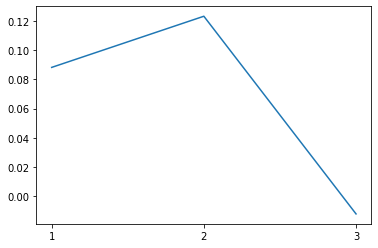

In [66]:
# 자체 그래프
plt.plot(c, a)
plt.xticks(c)
plt.show()

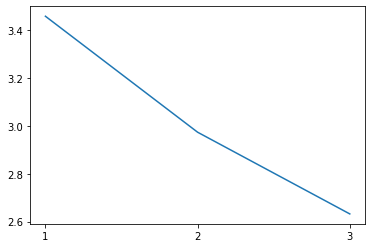

In [67]:
# 평점평균 그래프
plt.plot(c, b)
plt.xticks(c)
plt.show()

# 워드클라우드

In [49]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 156259 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [50]:
import matplotlib.font_manager as fm
sys_font = fm.findSystemFonts()

[f for f in sys_font if 'nanum' in f]

['/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunpenR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareEB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEcoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBrush.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumPen.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/nanum/Nanum

In [51]:
path = '/usr/share/fonts/truetype/nanum/NanumSquareRoundEB.ttf'
font_name = fm.FontProperties(fname=path).get_name()
print(font_name)

plt.rc('font', family = font_name)
fm._rebuild()

NanumSquareRound


In [52]:
from wordcloud import WordCloud
from PIL import Image
from collections import Counter
import numpy as np

In [53]:
pos_list = df[df['rating'] >= 4]
neg_list = df[df['rating'] <= 3]

In [54]:
pos_reviews = ''
   
for i in pos_list['review'] : 
  pos_reviews = pos_reviews + i + '\n'

In [55]:
neg_reviews = ''
   
for i in neg_list['review'] : 
  neg_reviews = neg_reviews + i + '\n'

In [56]:
pos_token = okt.morphs(pos_reviews)
neg_token = okt.morphs(neg_reviews)

## good image

In [57]:
'''
ps_app
ps_function
ps_contents
ps_payment
ps_app + ps_function + ps_contents + ps_payment
'''

'\nps_app\nps_function\nps_contents\nps_payment\nps_app + ps_function + ps_contents + ps_payment\n'

In [58]:
pos_words = []
for i in pos_token : 
  if i in ps_contents  : # 긍정-부정 점수 차이가 가장 큰 분류를 넣으면 됨
    pos_words.append(i)

In [59]:
pos_c = Counter(pos_words)

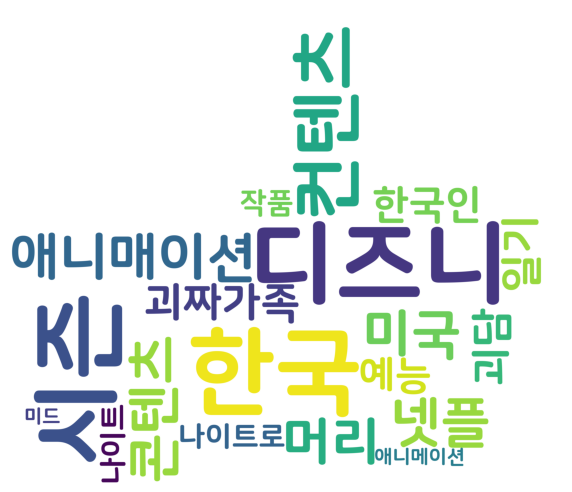

In [60]:
img = Image.open('/content/drive/MyDrive/good.png')
img_array = np.array(img)

wc = WordCloud(font_path=path, mask=img_array,background_color='white')
gen = wc.generate_from_frequencies(pos_c)

plt.figure(figsize=(10,12))
plt.axis("off")
plt.imshow(gen)

## bad image

In [61]:
'''
ng_app
ng_function
ng_contents
ng_payment
ng_function + ng_payment
ng_app + ng_function + ng_contents + ng_payment
'''

'\nng_app\nng_function\nng_contents\nng_payment\nng_function + ng_payment\nng_app + ng_function + ng_contents + ng_payment\n'

In [77]:
neg_words = []
for i in neg_token : 
  if i in ng_payment : # 긍정-부정 점수 차이가 가장 큰 분류를 넣으면 됨
    neg_words.append(i)

In [78]:
neg_c = Counter(neg_words)

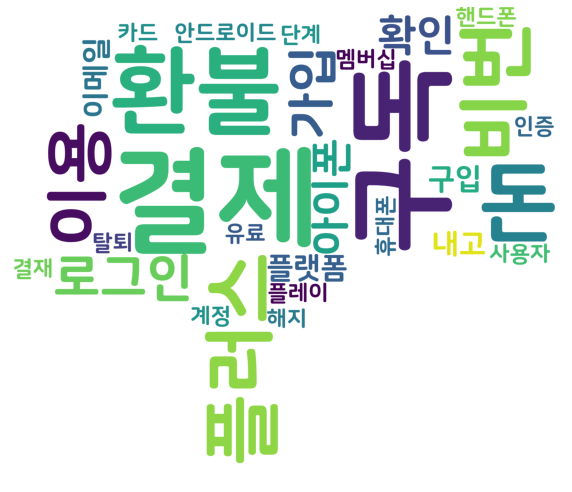

In [79]:
img = Image.open('/content/drive/MyDrive/bad.png')
img_array = np.array(img)

wc = WordCloud(font_path=path,mask=img_array,background_color='white')
gen = wc.generate_from_frequencies(neg_c)

plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(gen)